In [1]:
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from datetime import datetime, timedelta
from geopy import distance
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
from onc import ONC
import xarray as xr

# Import common code from the python-community-notebooks repository.
from pcn_common import get_onc_token_from_netrc,format_datetime, convert_scalar_data, calculate_distance_to_known_ports

In [2]:
token = get_onc_token_from_netrc(machine = 'data.oceannetworks.ca')
onc = ONC(token = token)

In [3]:
date_from = datetime(2025,11,3,9,0,0)
date_to = datetime(2025,11,3,20,15,0)

In [4]:
# Download NAV
params = {'locationCode': 'TWDP.N1',
          'deviceCategoryCode': 'NAV',
          'qualityControl': 'clean',
          'dateFrom': format_datetime(date_from),
          'dateTo': format_datetime(date_to),
          'fillGaps': False}
json_response = onc.getScalardata(filters = params, allPages=True)
nav = convert_scalar_data(json_response_data = json_response, out_as = 'xarray')

In [5]:
nav = calculate_distance_to_known_ports(nav)

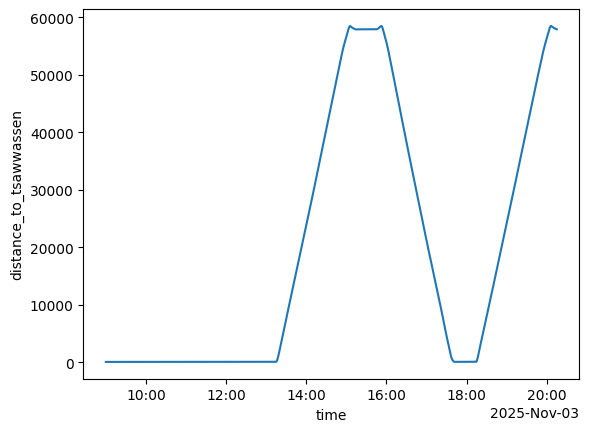

In [6]:
nav.distance_to_tsawwassen.dropna(dim = 'time').plot()